## TITANIC - Kaggle Problem

In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 
import visuals as vs
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import pandas as pd
import matplotlib 
import numpy as np 
import scipy as sp 
import IPython
from IPython import display
import sklearn 

import random
import time

from subprocess import check_output

In [2]:
plt.style.use('classic')

## Load Data Modelling Libraries

In [3]:
from sklearn import  linear_model,naive_bayes, discriminant_analysis, gaussian_process
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline
sns.set_style('white')

## Importing data 
* Train data ---------------- data1
* Kaggle test data -----------data_val

In [4]:
data1 = pd.read_csv('/home/guriboy/Music/DATA SCIENCE - SSRX/TITANIC/PYTHON IMPLEMENTATION/KAGGLE LR + LDA/traincpy.csv')
data_val  = pd.read_csv('/home/guriboy/Music/DATA SCIENCE - SSRX/TITANIC/PYTHON IMPLEMENTATION/KAGGLE LR + LDA/testcpy.csv')
data_cleaner = [data1, data_val]
print(data1.info()) 
data1.sample(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,NaN,S
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
781,782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0000,B20,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S


## Analysing and Cleaning data

* Lets see total number of people survied vs dead

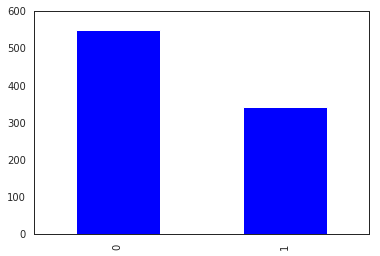

In [5]:
data1['Survived'].value_counts().plot(kind = 'bar')

In [6]:
survived = len(data1[data1['Survived']==1]['Survived'])
died = len(data1)-survived
percenatge_survived = round((survived/len(data1))*100,2)

In [7]:
print("Total survived  = ",percenatge_survived,'%')
print("Total died = ",100-percenatge_survived,'%')

Total survived  =  38.38 %
Total died =  61.62 %


* The above figure represents the overall view of the passangers survived and died
* In Titanic about `'38.38%`' of passangers survived and `'68.62%`' died


### Lets dig deep and analyse the trend of survival with other factors
* `'Survivals`' vs `'P_class`' - to analyze if there is some trend in prediction survival.

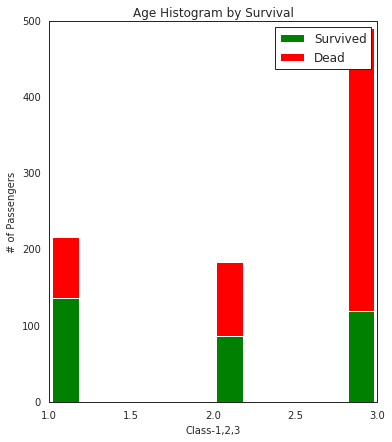

In [8]:
plt.subplots(figsize =(20, 15))
plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Pclass'], data1[data1['Survived']==0]['Pclass']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Class-1,2,3')
plt.ylabel('# of Passengers')
plt.legend()

* From the above figure it is clearly visible that `'Class 1`' were able to survive followed by `'Class 2`' and `'Class 3`'.
This trend is there may be because of the priority $i.e$ higher class will be allowed to evacuate first followed by other classes.

/home/guriboy/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


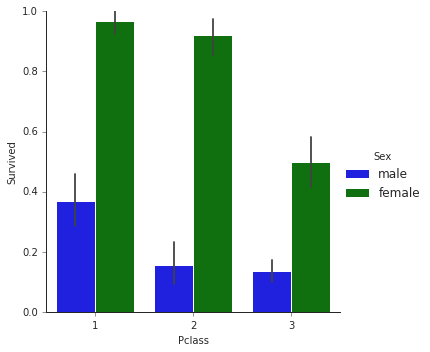

In [9]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("Pclass",'Survived','Sex',data=data1,kind ='bar')
    g.set_axis_labels("Pclass","Survived")

* From the above graph, it indicate that Females were given more importance and that too with respect to class status $i.e$ High class males and females got chance to escape first than the rest

## Q1- There is chance that High class passangers were able to escape due to the embarkment location and not due to the status. 
Lets analyze this thing

/home/guriboy/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


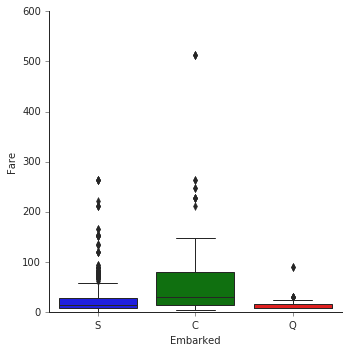

In [10]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("Embarked",'Fare',data=data1,kind ='box')
    g.set_axis_labels("Embarked","Fare")

### Following are the output from the figure above

* `'Embarkemt C`' is mostly assigned to `'Class 1`' passengers

* `'Embarkemt S`' is mostly assigned to `'Class 2`' passengers

* `'Embarkemt Q`' is mostly assigned to `'Class 3`' passengers


/home/guriboy/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


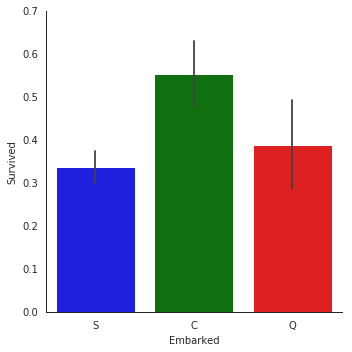

In [11]:
sns.factorplot("Embarked",'Survived',data=data1,kind ='bar')

## Answer 1 :
According to the above 2 figures, it is observed that `'Embarkemt C`' is mostly given to `'Class1`' people and the Survival rate of `'Embarkemt C`' passangers are also high among others. 

We observe that during evacuation, Embarkement is also selected because most of high class groups lives there.
Therefore, it is not a chance

## Lets consider the survival rate according to Fare and Age group 

/home/guriboy/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/guriboy/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


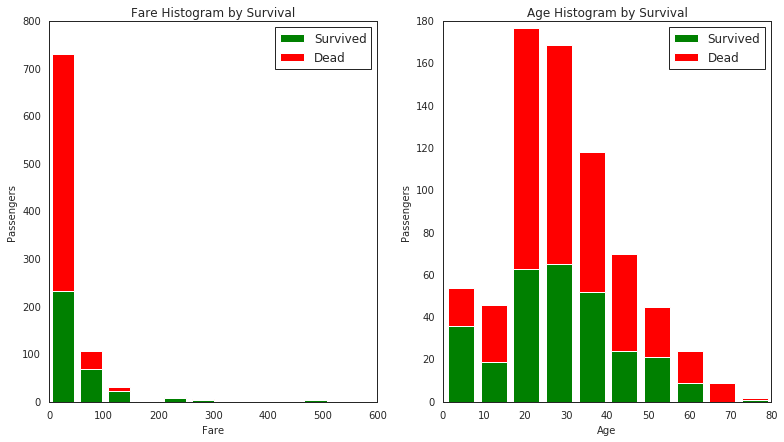

In [12]:
plt.subplots(figsize =(20, 15))

plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare')
plt.ylabel('Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('Passengers')
plt.legend()




## From the above two parallel figure following observations are made:
#### `'FARE`' VS `'SURVIVAL`' OBSERVATION:

* Passanger who paid more were survied more than passangers who paid less ($left Figure$)

#### `'AGE`' vs `'SURVIVAL`' OBSERVATION

* Talking about age, almost all old age passangers Age[70-80] died.
* Second most deaths were made in age group [20-40]

## Deep analysis of deaths according to age groups

#### Distribute the age groups into 4 category :
* `'Child`'             $(0-12 years)$
* `'Adolescence`'       $(13-18 years)$
* `'Adult`'             $(19-49 years)$
* `'Senior`'            $Adult (50 years and above) $
    

In [49]:
child= np.array(range(13))
Adolescence = np.array(range(13,19))
Adult = np.array(range(19,50))
Senior_Adult = np.array(range(50,100))

In [50]:
data_new = data1

### DO AGE MEAN FIRST

In [52]:
data_return = data1
def add_age_group(df):
    
    df=df.assign(Age_group=0)
    for i in range(len(df)):
        if (df["Age"].iloc[i] in child):
            df['Age_group'].iloc[i] = "child"
        if (df["Age"].iloc[i] in Adolescence):
            df['Age_group'].iloc[i] = "Adolescent"
        if (df["Age"].iloc[i] in Adult):
            df['Age_group'].iloc[i] = "Adult"
        if (df["Age"].iloc[i] in Senior_Adult):
            df['Age_group'].iloc[i] = "Senior_Adult"
        data_return=df
    return data_return
    

In [53]:
data_new = add_age_group(data_new)

In [56]:
data_new.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group
0,0,2,1,28,1,0,18,2,Adult
1,1,0,0,51,1,0,207,0,Senior_Adult
2,1,2,0,34,0,0,41,2,Adult
3,1,0,0,47,1,0,189,2,Adult
4,0,2,1,47,0,0,43,2,Adult


In [57]:
data1=data_new

In [95]:
data_val['Age'] = np.ceil(data_val['Age'])

In [97]:
data_val = add_age_group(data_val)

/home/guriboy/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## BACK TO ANALYSIS OF AGE GROUP

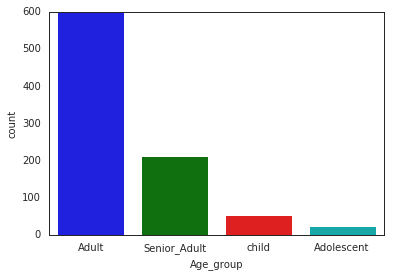

In [65]:
sns.countplot("Age_group",data=data_new)

#### Above figure represents that most of the passangers are `'Adult`' followed by --> `'Senior_adult`' --> `'Child`' --> `'Adolscent`'


/home/guriboy/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


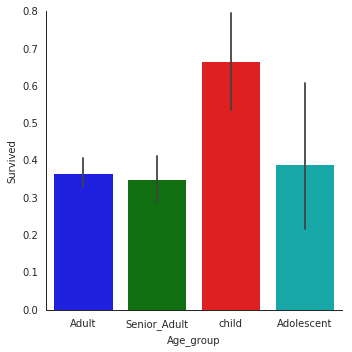

In [69]:
sns.factorplot("Age_group",'Survived',data=data_new,kind ='bar')

## Following are the observation from above plot

*   Among the Age groups,`'childrens`' were given more priority


* `'Adolescent`' were rescued after childrens


*   Most deaths are in `'Adult`' and `'Senior_Adult`' group

## -------------------------age done----------------------------

In [15]:
def null_percentage(df):
    total= len(df)
    null_values = df.isnull().sum().sort_values(ascending = False)
    percentage = round((null_values/total)*100,2)
    return pd.concat([null_values,percentage],axis=1,keys=['Null_Values','Percentage'])
    

In [16]:
null_percentage(data1)

,Null_Values,Percentage
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [99]:
null_percentage(data_val)

,Null_Values,Percentage
Cabin,327,78.23
Fare,1,0.24
Age_group,0,0.00
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Age,0,0.00
Sex,0,0.00
Name,0,0.00


### From the above dataframe we observe that: 
* In Training set two types of values are missing 
    * `'Cabin`'   (77%)
    * `'Age'`     (19.87%)

### In Test data
* In  Testing  set three types of values are missing
    * `'Cabin`'  (78.23%)
    *  `'Age`'   (20.57%)
    *  `'Fare`'  (0.24%)

As most of the values are missing from the Cabin feature, it is better to remove the column. Moreover, Ticket and PassangerId is of text data and playing no  significant role is prediction. Hence, it should also be removed.

In [18]:
data1.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [134]:
drop_column = ['PassengerId','Cabin', 'Ticket','Name']
for i in data_cleaner:
    i.drop(drop_column,axis=1,inplace =True)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group
0,1.0,1.0,0.524590,0.000000,0.0,0.142012,0.5,0.333333
1,1.0,0.0,0.721311,0.166667,0.0,0.029586,1.0,0.333333
2,0.5,1.0,0.934426,0.000000,0.0,0.242604,0.5,0.666667


### Now comes to Age column. As it contains the second most missing values, But it is not worth to remove it, as it seems to have significant impact on the prediction
### We have three options to fill Age column:
* 1) USE `'MEAN'`, '`MODE'` from whole coulmn
* 2) Analyse the age with other columns like '`Pclass'` and '`Sex'`, check the distribution of the ages in Pclass and Sex in Pclass. Accorindly we can add the values.
* 3) We can make a seperate regression model as predict the values of the age.

#### AS of now, I will use method 2

In [ ]:
## Check the distribution of the AGE in PClASS AND SEX

In [20]:
import seaborn as sns

/home/guriboy/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


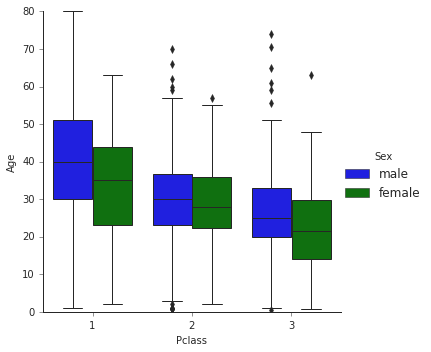

In [21]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("Pclass",'Age','Sex',data=data1,kind ='box')
    g.set_axis_labels("Pclass","Age")

* The above shown Boxplot of '`pclass'` and `'Age`'represents the distribution of male and female of each class into Age groups

                                
                                                    
            |------------|-------------|-------------|
            |  BOXPLOT   |  MALE(MEAN) | FEMALE(MEAN)|
            |------------|-------------|-------------|
            |   Pclass1  |     36 	 |    34.61	|             
            |------------|-------------|-------------|
            |   Pclass2  |    30.74    |    28.72    | 
            |------------|-------------|-------------|
            |   Pclass3  |    26.51	|    21.75    |   
            |------------|-------------|-------------|
            
* According to these values I am going to fill the age missing values


In [22]:
def Age_mean(df,sex,pcls):
    age_mean = df
    
    ageMean = np.ceil(age_mean[(age_mean['Sex'] == sex) & (age_mean['Pclass']==int(pcls))]['Age'].mean())
    return ageMean


In [23]:
age_P1_male_mean = Age_mean(data1,'male',1)
age_P1_female_mean = Age_mean(data1,'female',1)
age_P2_male_mean = Age_mean(data1,'male',2)
age_P2_female_mean = Age_mean(data1,'female',2)
age_P3_male_mean = Age_mean(data1,'male',3)
age_P3_female_mean = Age_mean(data1,'female',3)

In [24]:
def add_mean_train(df):
    for i in range(len(df)):
        if(pd.isnull(df['Age'].iloc[i])and df['Pclass'].iloc[i] == 1 and df['Sex'].iloc[i]=='male'):
            df['Age'][i] = age_P1_male_mean
        if(pd.isnull(df['Age'].iloc[i])and df['Pclass'].iloc[i] == 1 and df['Sex'].iloc[i]=='female'):
            df['Age'][i] = age_P1_female_mean
        if(pd.isnull(data1['Age'].iloc[i])and df['Pclass'].iloc[i] == 2 and df['Sex'].iloc[i]=='male'):
            df['Age'][i] = age_P2_male_mean
        if(pd.isnull(df['Age'].iloc[i])and df['Pclass'].iloc[i] == 2 and df['Sex'].iloc[i]=='female'):
            df['Age'][i] = age_P2_female_mean
        if(pd.isnull(df['Age'].iloc[i])and df['Pclass'].iloc[i] == 3 and df['Sex'].iloc[i]=='male'):
            df['Age'][i] = age_P3_male_mean
        if(pd.isnull(df['Age'].iloc[i])and df['Pclass'].iloc[i] == 3 and df['Sex'].iloc[i]=='female'):
            df['Age'][i] = age_P3_female_mean

In [25]:
add_mean_train(data1)

/home/guriboy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/guriboy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/guriboy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/guriboy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWar

In [26]:
print(" CHECKING NULL VALUES IN TRAIN DATA\n", data1.isnull().sum())

 CHECKING NULL VALUES IN TRAIN DATA
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64


In [30]:
### NOW for Validation data

In [31]:
def add_mean_val(df):
    for i in range(len(df)):
        if(pd.isnull(df['Age'].iloc[i])and df['Pclass'].iloc[i] == 1 and df['Sex'].iloc[i]=='male'):
            df['Age'][i] = valage_P1_male_mean
        if(pd.isnull(df['Age'].iloc[i])and df['Pclass'].iloc[i] == 1 and df['Sex'].iloc[i]=='female'):
            df['Age'][i] = valage_P1_female_mean
        if(pd.isnull(df['Age'].iloc[i])and df['Pclass'].iloc[i] == 2 and df['Sex'].iloc[i]=='male'):
            df['Age'][i] = valage_P2_male_mean
        if(pd.isnull(df['Age'].iloc[i])and df['Pclass'].iloc[i] == 2 and df['Sex'].iloc[i]=='female'):
            df['Age'][i] = valage_P2_female_mean
        if(pd.isnull(df['Age'].iloc[i])and df['Pclass'].iloc[i] == 3 and df['Sex'].iloc[i]=='male'):
            df['Age'][i] = valage_P3_male_mean
        if(pd.isnull(df['Age'].iloc[i])and df['Pclass'].iloc[i] == 3 and df['Sex'].iloc[i]=='female'):
            df['Age'][i] = valage_P3_female_mean

In [32]:
## FOR DATA_VAL
valage_P1_male_mean = Age_mean(data_val,'male',1)
valage_P1_female_mean = Age_mean(data_val,'female',1)
valage_P2_male_mean = Age_mean(data_val,'male',2)
valage_P2_female_mean = Age_mean(data_val,'female',2)
valage_P3_male_mean = Age_mean(data_val,'male',3)
valage_P3_female_mean = Age_mean(data_val,'female',3)

In [89]:
add_mean_val(data_val)

/home/guriboy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/guriboy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/guriboy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/guriboy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWar

In [34]:
dict = {'Age_P1_mean_male': [age_P1_male_mean], 
        'Age_P1_mean_female': [age_P1_female_mean], 
        'Age_P2_mean_male': [age_P2_male_mean],
        'Age_P2_mean_female':[age_P2_female_mean],
        'Age_P3_mean_male' : [age_P3_male_mean],
        'Age_P3_mean_female': [age_P3_female_mean]}  
df_train = pd.DataFrame(dict)  

In [35]:
dict_val = {'ValAge_P1_mean_male': [valage_P1_male_mean], 
        'ValAge_P1_mean_female': [valage_P1_female_mean], 
        'ValAge_P2_mean_male': [valage_P2_male_mean],
        'ValAge_P2_mean_female':[valage_P2_female_mean],
        'ValAge_P3_mean_male' : [valage_P3_male_mean],
        'ValAge_P3_mean_female': [valage_P3_female_mean]}  
df_val = pd.DataFrame(dict_val)  

In [88]:
df_train

,Age_P1_mean_male,Age_P1_mean_female,Age_P2_mean_male,Age_P2_mean_female,Age_P3_mean_male,Age_P3_mean_female
0,42.0,35.0,31.0,29.0,27.0,22.0


In [87]:
df_val

,ValAge_P1_mean_male,ValAge_P1_mean_female,ValAge_P2_mean_male,ValAge_P2_mean_female,ValAge_P3_mean_male,ValAge_P3_mean_female
0,41.0,42.0,31.0,25.0,25.0,24.0


In [38]:
## Go back to ANALYSIS PART

## Age null values are prefectly replaced. Now, move to Fare in TEST_VAL
Here only one value is missing in DATA_VAL so we can replace it with mean according to class

In [103]:
data_val.isnull().sum()

Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         1
Embarked     0
Age_group    0
dtype: int64

In [104]:
null_data = data_val[data_val.isnull().any(axis=1)]
null_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group
152,3,male,61.0,0,0,NaN,S,Senior_Adult


In [105]:
fare_mean = round(data_val[data_val['Pclass']==3]['Fare'].mean(),2)
fare_mean

12.46

In [106]:
data_val['Fare'].iloc[152] =fare_mean

/home/guriboy/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [107]:
data1.dropna(subset=['Embarked'],inplace=True)
data1.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Age_group    0
dtype: int64

### --------------------------------------CLEANING DONE-----------------------------------------------------

# LABEL ENCODING
* We have completed the cleaning part.
* In data we have categorical data also, so we need to encode into numerical form. 
* For this task, we will use Label_Encoding

In [58]:
label = LabelEncoder()
data1 = data1.apply(label.fit_transform)
data_val = data_val.apply(label.fit_transform)

## ------------------------------LABEL ENCODING DONE---------------------------------------------------------

## ADD NEW FEATURE 
####  FEATURE 1
* There is a term called `'Synergy effect`' or `'Interaction`'  between features. This will lead to justify the increase in the value of one feature due to the per unit change in another feature. 
For example,
\begin{align*}
Y = β0 + β1*X1 + β2*X 2 + error.
\end{align*}

* According to this model, if we increase X 1 by one unit, then Y will increase
by an average of β 1 units. Notice that the presence of X 2 does not alter
this statement—that is, regardless of the value of X 2 , a one-unit increase
in X 1 will lead to a β 1 -unit increase in Y . One way of extending this model
to allow for interaction effects is to include a third predictor, called an
interaction term, which is constructed by computing the product of X 1
and X 2 . This results in the model

\begin{align*}
Y = β0 + β1*X1 + β2*X 2 + (β3*X1*X 2) + .
\end{align*}

I have choosen these two features because, on increasing the `'P_class`' not only the survival rate is increasing moreover, Age group is also increasing. As we have saw in BOX_PLOT of AGE and `'P_Class`'. 


data1['Age*Class']=data1['Age']*data1['Pclass']
data_val['Age*Class']=data_val['Age']*data_val['Pclass']

### Feature 2
* Now we know that `'Sibsp`' resembles Siblings and `'Parch`' represents parents. So accordingly we can find total family members.

data1['Family_Size']=data1['SibSp']+data1['Parch']
data_val['Family_Size']=data_val['SibSp']+data_val['Parch']

In [ ]:
data1.head(10)

### Feature 3 

* `'Age_group`' feature is added during analysis of the age vs survival

In [70]:
data1.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group
0,0,2,1,28,1,0,18,2,1
1,1,0,0,51,1,0,207,0,2


###  NORMALIZE THE DATA
As quantitative values are having a little difference. For exmaple - '`FARE'` , '`AGE'` have large values as compared to rest of features. This condition will make algorithm to put more weights to those features. Therefore, to deal with this situation NORMALIZATION is must.
For this we ususally use - '`MIN_MAX_SCALER'`

In [71]:
import vs as vs2

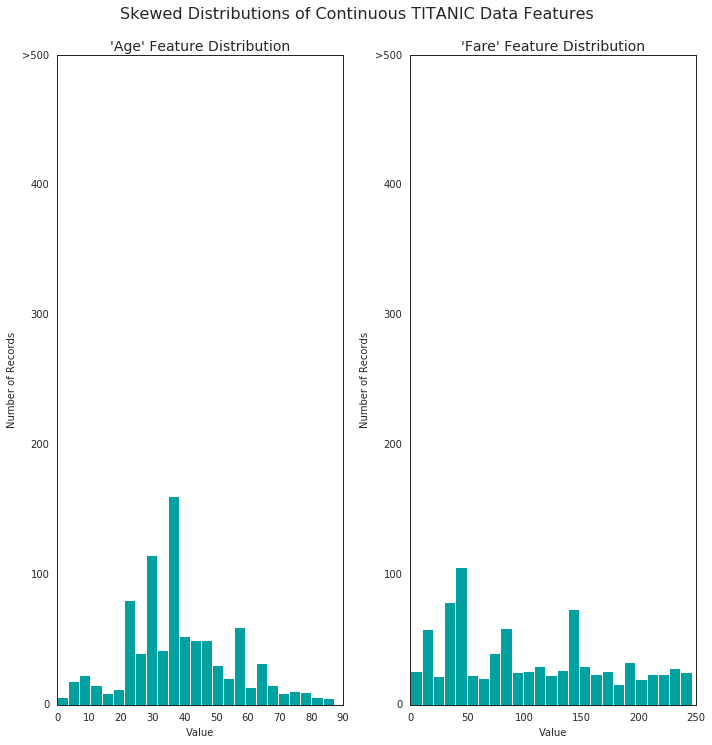

In [72]:
vs2.distribution(data1)

As we can see here '`FARE'` And  '`AGE'`are the values having data larger than other variable. So to make the features in equal distribution we had done *Normalization*

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
#numerical = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Age*Class','Family_Size']
numerical = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Age_group']

data1[numerical] = scaler.fit_transform(data1[numerical])
data_val[numerical] = scaler.fit_transform(data_val[numerical])

# Show an example of a record with scaling applied
#display(data1.head(n = 5))


/home/guriboy/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/guriboy/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [112]:
data_val.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group
0,1.0,1.0,0.524590,0.000000,0.000000,0.142012,0.5,0.333333
1,1.0,0.0,0.721311,0.166667,0.000000,0.029586,1.0,0.333333
2,0.5,1.0,0.934426,0.000000,0.000000,0.242604,0.5,0.666667
3,1.0,1.0,0.393443,0.000000,0.000000,0.201183,1.0,0.333333
4,1.0,0.0,0.311475,0.166667,0.142857,0.272189,1.0,0.333333


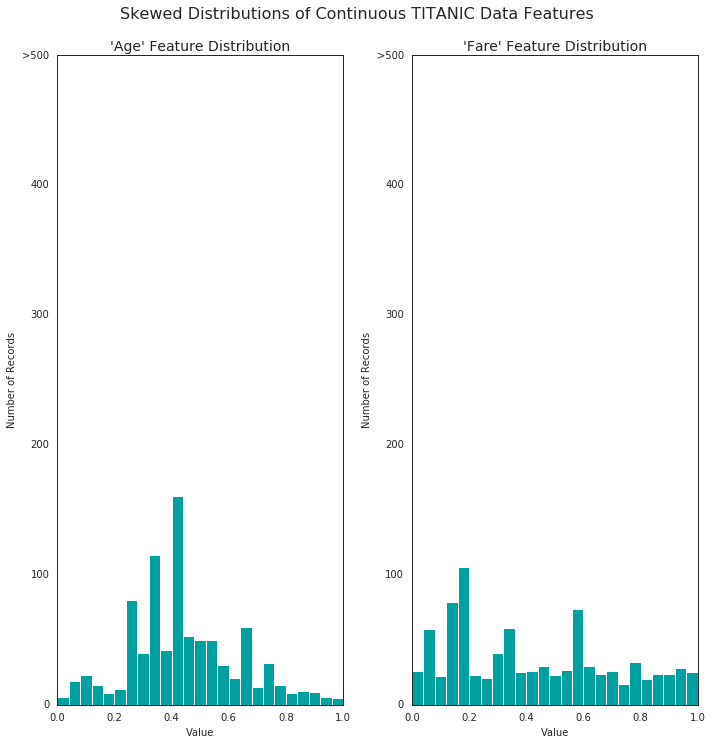

In [113]:
vs2.distribution(data1)

## In the above figure we can see that now data is fully distributed over its x axis
* Data is now fully distributed between [0,1]

In [115]:
data_val.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group
0,1.0,1.0,0.524590,0.000000,0.000000,0.142012,0.5,0.333333
1,1.0,0.0,0.721311,0.166667,0.000000,0.029586,1.0,0.333333
2,0.5,1.0,0.934426,0.000000,0.000000,0.242604,0.5,0.666667
3,1.0,1.0,0.393443,0.000000,0.000000,0.201183,1.0,0.333333
4,1.0,0.0,0.311475,0.166667,0.142857,0.272189,1.0,0.333333


###  Correlation of features

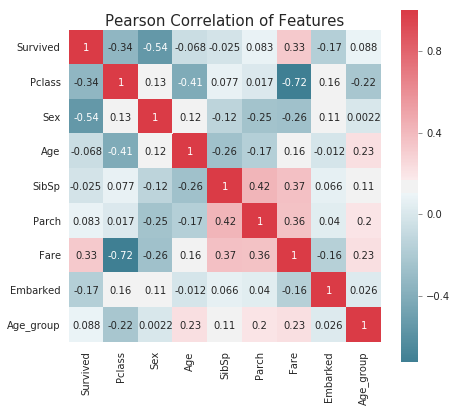

In [133]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(7,7))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(),
        annot=True,
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

## From the heat_map we can see that our new feature "Age_group" has good correlation with other features

* Age_group and Fare $(0.23)$

* Age_group and Parch $(0.2)$

In [117]:
Target = ["Survived"]
#data1_x_calc = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Age*Class','Family_Size']
data1_x_calc = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Age_group']

from sklearn.model_selection import train_test_split

train1_x, test1_x, train1_y, test1_y = train_test_split(data1[data1_x_calc], 
                                                    data1[Target], 
                                                    test_size = 0.2, 
                                                    random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train x Shape: {}".format(train1_x.shape))
print("Test x Shape: {}".format(test1_x.shape))
print("Train y  Shape: {}".format(train1_y.shape))
print("Test y  Shape: {}".format(test1_y.shape))

Data1 Shape: (889, 9)
Train x Shape: (711, 8)
Test x Shape: (178, 8)
Train y  Shape: (711, 1)
Test y  Shape: (178, 1)


In [ ]:
## TILL Now we have analyzed the data well. ITS Time to make some predictions.

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual survived, what would  that model's accuracy and F-score be on this dataset?

In [118]:
Target = data1['Survived']

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

survived_pred=Target.apply(lambda x:1)


TP=sum(map(lambda x,y: 1 if x==1 and y==1 else 0, Target,survived_pred)) #True Pos
FP=sum(map(lambda x,y: 1 if x==0 and y==1 else 0, Target,survived_pred)) #False Pos
FN=sum(map(lambda x,y: 1 if x==1 and y==0 else 0, Target,survived_pred)) #False Neg


# accuracy = TP/(TP+FP)
accuracy = float(TP)/(TP+FP)
#print(accuracy)
#recall = TP/(TP+FN)
recall=float(TP)/(TP+FN)

beta=0.5
fscore = (1+beta**2)*((accuracy*recall)/(beta**2*accuracy+recall))

print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.3825, F-score: 0.4363]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently that you may choose from:**
- K-Nearest Neighbors (KNeighbors)
- Support Vector Machines (SVM)
- Logistic Regression

In [120]:
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 

    results = {}
    
    start = time.time()
    learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time.time()
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time.time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time.time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = round(accuracy_score(y_train[:300],predictions_train),3)
        
    #  Compute accuracy on test set using accuracy_score()
    results['acc_test'] = round(accuracy_score(y_test,predictions_test),3)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = round(fbeta_score(y_train[:300],predictions_train,beta = 0.5),3)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = round(fbeta_score(y_test,predictions_test, beta = 0.5),3)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

In [ ]:
### Quadratic Discriminant Analysis
### Logistic Regression
### KNN

In [121]:
import vs2 as vs

/home/guriboy/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/guriboy/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/guriboy/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC trained on 7 samples.
SVC trained on 71 samples.
SVC trained on 711 samples.


/home/guriboy/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/guriboy/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/guriboy/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/guriboy/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/guriboy/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A co

QuadraticDiscriminantAnalysis trained on 7 samples.
QuadraticDiscriminantAnalysis trained on 71 samples.
QuadraticDiscriminantAnalysis trained on 711 samples.
KNeighborsClassifier trained on 7 samples.
KNeighborsClassifier trained on 71 samples.
KNeighborsClassifier trained on 711 samples.


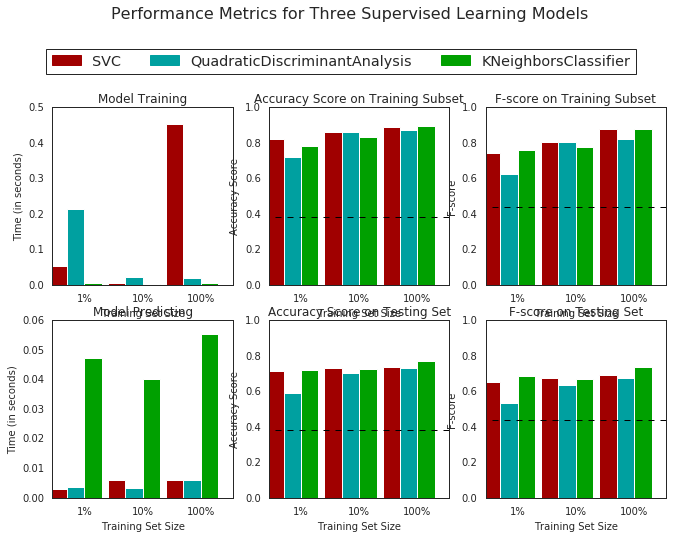

In [122]:
 from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#clf_A = LogisticRegression(random_state=0)
clf_A = SVC(kernel='poly', gamma=3)
#clf_B = SVC(random_state = 0)
clf_B = QuadraticDiscriminantAnalysis()
clf_C = KNeighborsClassifier(n_neighbors=5)
def get_sample_size(percentage):
    return int((float(percentage)/100)*train1_x.shape[0])

samples_1 = get_sample_size(1.0)
samples_10 = get_sample_size(10.0)
samples_100 = get_sample_size(100.0)
# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, train1_x, train1_y, test1_x, test1_y)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [125]:
SVM = results['SVC'][2]
QDA = results['QuadraticDiscriminantAnalysis'][2]
KNN = results['KNeighborsClassifier'][2]

In [126]:
print(SVM)
print("-----------------")
print(QDA)
print("-----------------")
print(KNN)

{'train_time': 0.4537925720214844, 'pred_time': 0.00590968132019043, 'acc_train': 0.887, 'acc_test': 0.736, 'f_train': 0.88, 'f_test': 0.689}
-----------------
{'train_time': 0.020117521286010742, 'pred_time': 0.005870342254638672, 'acc_train': 0.87, 'acc_test': 0.73, 'f_train': 0.823, 'f_test': 0.673}
-----------------
{'train_time': 0.0036466121673583984, 'pred_time': 0.0554652214050293, 'acc_train': 0.893, 'acc_test': 0.77, 'f_train': 0.878, 'f_test': 0.738}


##                                         OUTPUT TABLE        :   
               
                |------------|-------------|-------------|-------------|
                |  Approach  |    SVM      |     QDA     |    KNN      |
                |------------|-------------|-------------|-------------|
                | Training   |             |             |             |
                |  Accuracy  |    0.887    |    0.87     |    0.893    |
                |------------|-------------|-------------|-------------|
                |  Test      |             |             |             |
                |  Accuracy  |    0.736    |    0.73     |    0.77     |
                |------------|-------------|-------------|-------------|
                | F-Score    |    0.69     |    0.67     |    0.738    |
                |            |             |             |             |
                |------------|-------------|-------------|-------------|
                

### ANALYSIS OF RESULT 
* As we see in the output histograms and table above, `'KNN`'  does the best among the three.

* There is huge difference between model's `'trainng accuracy'` and '`Testing_accuracy'`. This shows that model is over fitting on the data.

* To deal with the over fitting problem we can remove certain features that are irrelevent to the model. 

* To deal with Overfitting we can do Regularization.


## For kaggle prediction

In [127]:
Clf_SCV = clf_A.fit(train1_x,train1_y)
pred  = clf_A.predict(data_val)

/home/guriboy/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [128]:
pred_KAGGLE_NEW = pd.DataFrame(pred)
pred_KAGGLE_NEW.to_csv('/home/guriboy/Music/DATA SCIENCE - SSRX/TITANIC/PYTHON IMPLEMENTATION/KAGGLE LR + LDA/RESULT/SVM_LATEST.csv',index=False,header = True)

## KAGGLE PREDICTION SCORE = 0.77555


In [129]:
Clf_QDA = clf_B.fit(train1_x,train1_y)
pred  = clf_B.predict(data_val)

/home/guriboy/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [130]:
pred_KAGGLE_NEW = pd.DataFrame(pred)
pred_KAGGLE_NEW.to_csv('/home/guriboy/Music/DATA SCIENCE - SSRX/TITANIC/PYTHON IMPLEMENTATION/KAGGLE LR + LDA/RESULT/QDA_LATEST.csv',index=False,header = True)

In [131]:
Clf_QDA = clf_B.fit(train1_x,train1_y)
pred  = clf_B.predict(data_val)

/home/guriboy/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [132]:
pred_KAGGLE_NEW = pd.DataFrame(pred)
pred_KAGGLE_NEW.to_csv('/home/guriboy/Music/DATA SCIENCE - SSRX/TITANIC/PYTHON IMPLEMENTATION/KAGGLE LR + LDA/RESULT/KNN_LATEST.csv',index=False,header = True)